In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
class Particle():
    
    # init
    def __init__(self, x0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = x0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(x0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters
    
    def GetR(self):
        return self.radius

In [13]:
# Discretization
dt = 0.01
tmax = 10
t = np.arange(0,tmax+dt,dt)
print(len(t))

1001


In [14]:
def GetParticles(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [15]:
Limits = np.array([20.,20.])

In [26]:
Particles = GetParticles(10,Limits[0],4,dt=dt)

In [28]:
Particles[0].Evolution(1)
#print(Particles[0].GetPosition())

<IPython.core.display.Javascript object>


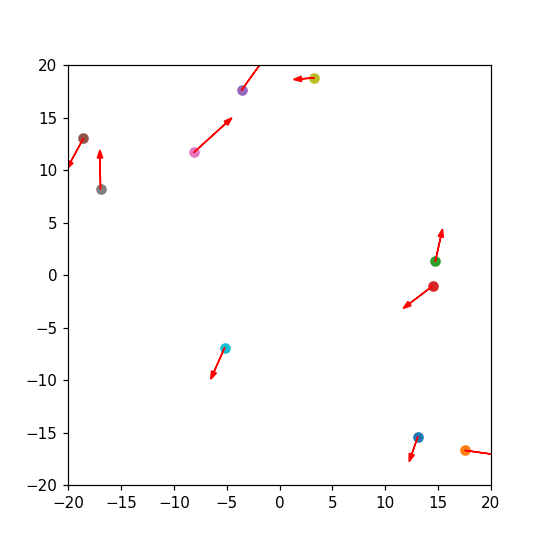

In [37]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

ax.set_xlim(-Limits[0],Limits[0])
ax.set_ylim(-Limits[1],Limits[1])

for p in Particles:
    plt.scatter(p.r[0],p.r[1]) 
    plot = ax.arrow(p.r[0],p.r[1],p.v[0],p.v[1],color='r',head_width=0.5)

In [ ]:
def RemoveParticles(Particles):
    print('--- Deleting Particles---')
    for i in range(len(Particles)):
        if len(Particles) > 0:
            del Particles[-1]

In [ ]:
#RemoveParticles(Particles)